--2021-01-24 10:14:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-01-24 10:14:59 (171 MB/s) - ‘loan_train.csv’ saved [23101/23101]

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial froz

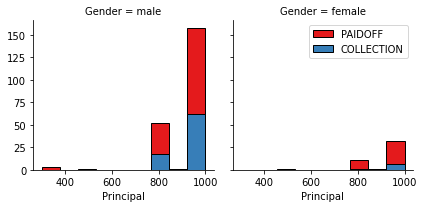

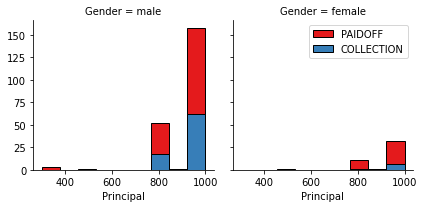

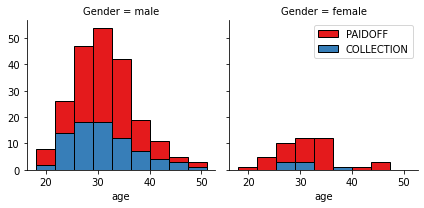

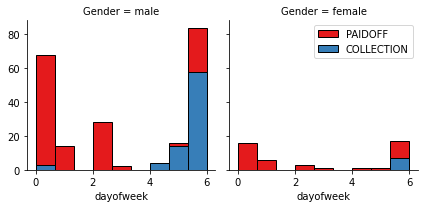

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857
Train set Accuracy:  0.8007246376811594
Test set Accuracy:  0.6857142857142857


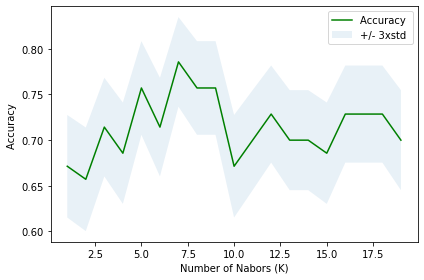

The best accuracy was with 0.7857142857142857 with k= 7
Train set2: (242, 8) (242,)
Test set2: (104, 8) (104,)
Test set2: (104, 8) (104,)
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
DecisionTrees's Accuracy:  0.6538461538461539


In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
get_ipython().run_line_magic('matplotlib', 'inline')


# In[2]:


get_ipython().system('wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')


# In[3]:


df = pd.read_csv('loan_train.csv')
df.head()


# In[4]:


df.shape


# In[5]:


df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()


# In[6]:


df['loan_status'].value_counts()


# In[7]:


get_ipython().system('conda install -c anaconda seaborn -y')


# In[ ]:


import seaborn as sns
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


# In[ ]:


bins= np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue= "loan_status", palette="Set1",col_wrap=2)
g.map(plt.hist, 'Principal', bins =bins, ec ="k")
g.axes[-1].legend()
plt.show()


# In[ ]:


bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


# In[ ]:


df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


# In[ ]:


df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()


# In[ ]:


df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


# In[ ]:


df['Gender'].replace(to_replace=[0,1],value=['male','female'],inplace=True)
df.head()


# In[ ]:


df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()


# In[ ]:


df.groupby(['education'])['loan_status'].value_counts(normalize=True)


# In[ ]:


df[['Principal','terms','age','Gender','education']].head()


# In[ ]:


Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


# In[ ]:


X = Feature
X[0:5]


# In[ ]:


y = df['loan_status'].values
y[0:5]


# In[ ]:


X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


# In[ ]:


from sklearn.neighbors import KNeighborsClassifier


# In[ ]:


k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


# In[ ]:


yhat = neigh.predict(X_test)
yhat[0:5]


# In[ ]:


from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


# In[ ]:


k= 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh6
yhat6 = neigh.predict(X_test)
yhat6[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))


# In[ ]:


Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


# In[ ]:


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


# In[ ]:


print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


# In[ ]:


from sklearn.tree import DecisionTreeClassifier


# In[ ]:


from sklearn.model_selection import train_test_split


# In[ ]:


X_trainset2, X_testset2, y_trainset2, y_testset2 = train_test_split(X, y, test_size=0.3, random_state=3)


# In[ ]:


print('Train set2:', X_trainset2.shape, y_trainset2.shape)
print('Test set2:', X_testset2.shape, y_testset2.shape)


# In[ ]:


print('Test set2:', X_testset2.shape, y_testset2.shape)


# In[ ]:


loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree


# In[ ]:


loanTree.fit(X_trainset2,y_trainset2)


# In[ ]:


predTree = loanTree.predict(X_testset2)


# In[ ]:


print (predTree [0:5])
print (y_testset2 [0:5])


# In[ ]:


from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset2, predTree))


# In[ ]:








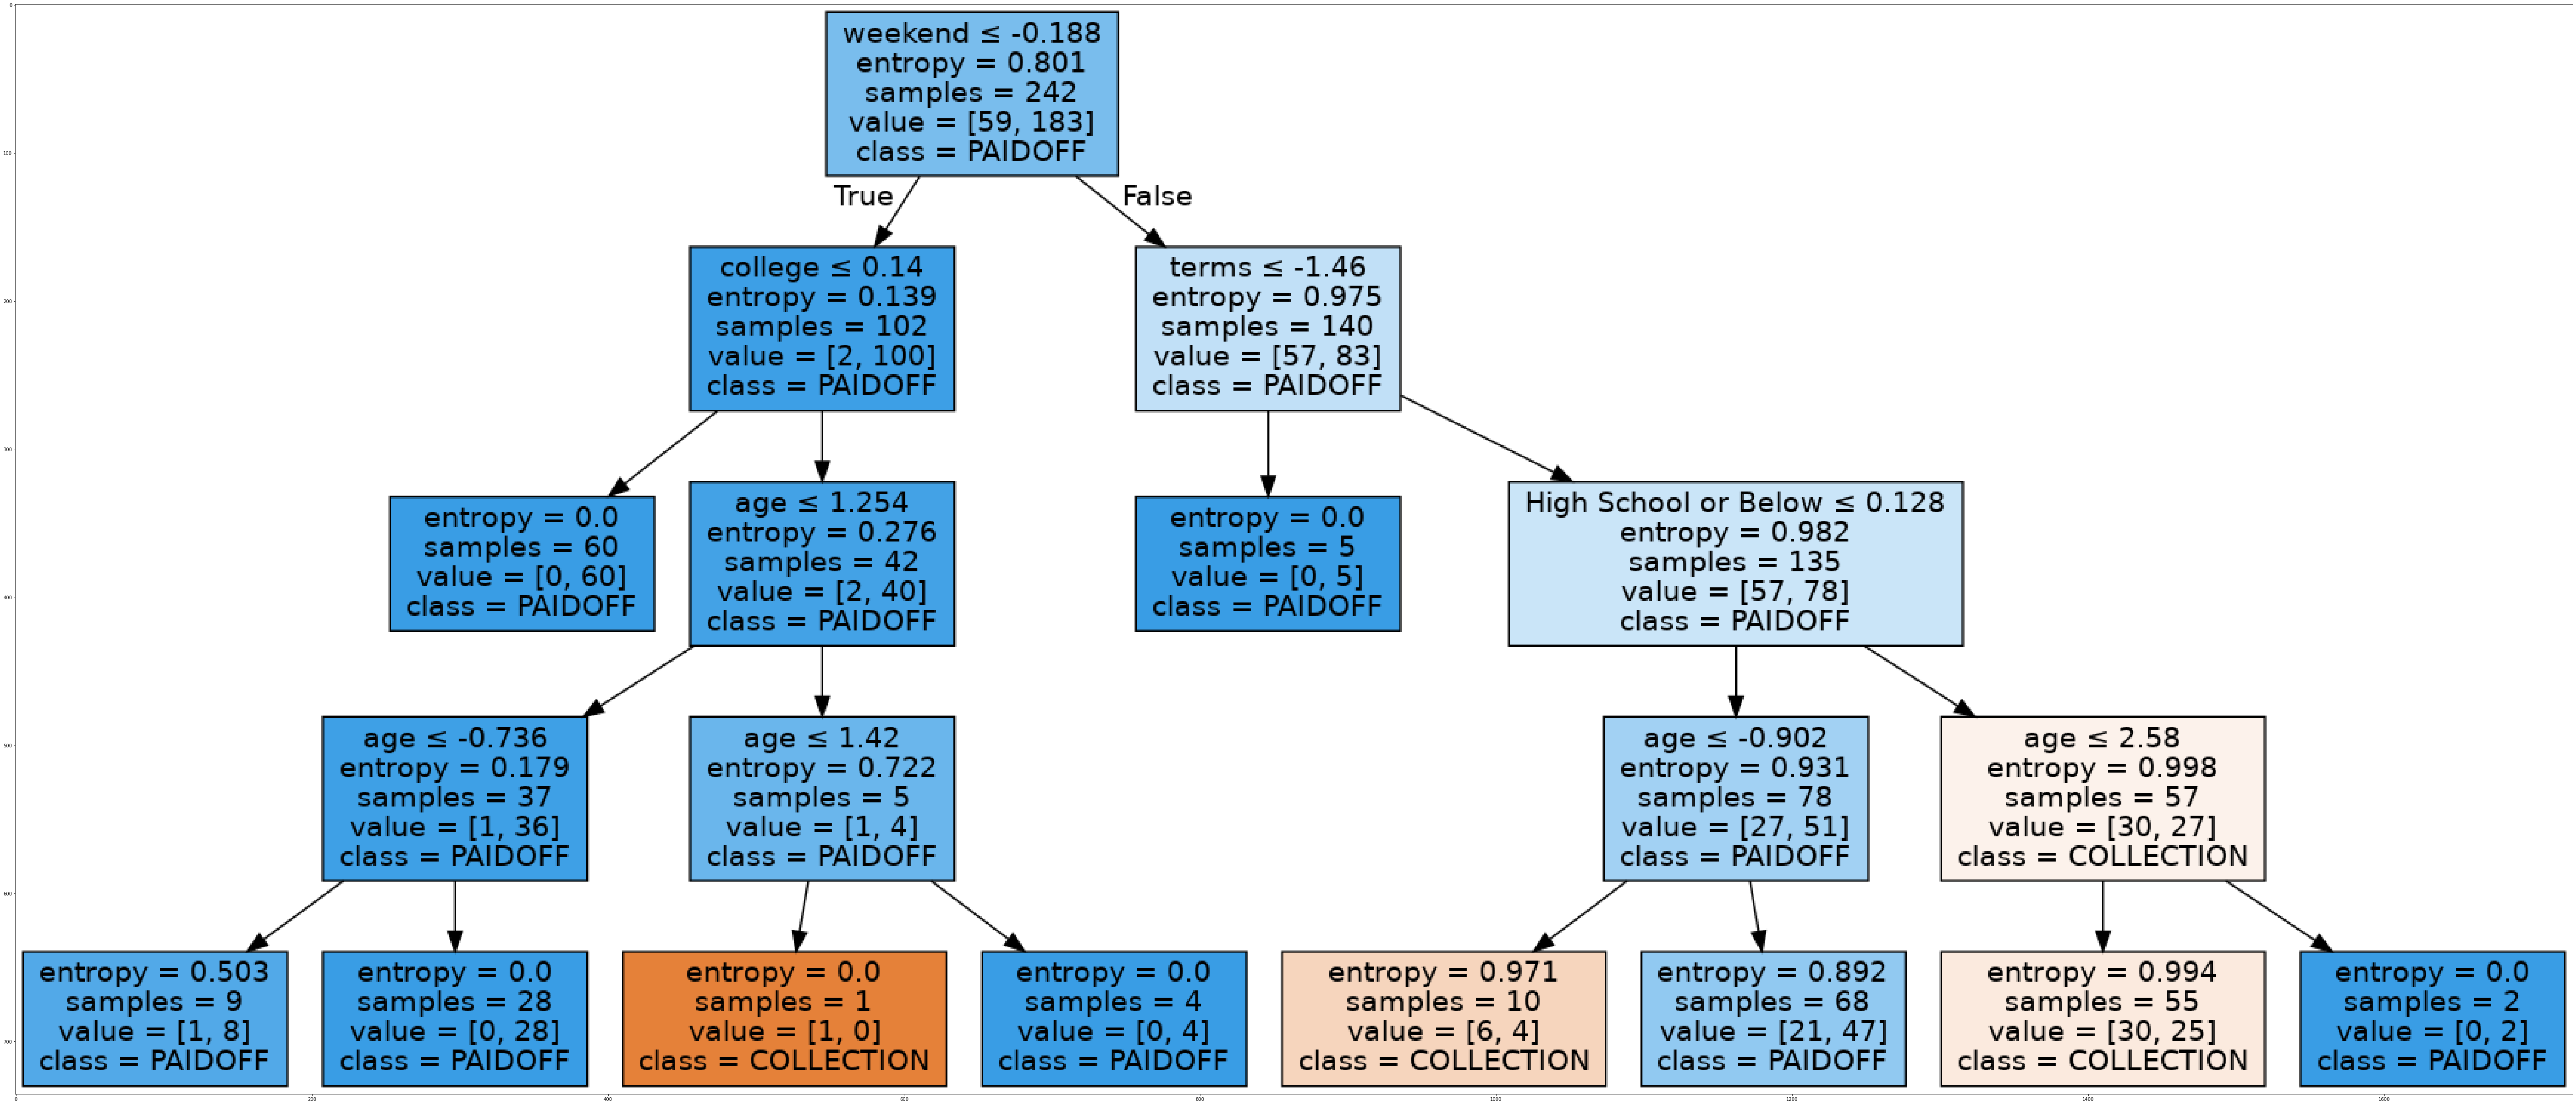

In [6]:
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus
dot_data = StringIO()
filename = "tree.png"
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
X = Feature
featureNames = X.columns
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset2), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


In [7]:

import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [8]:
yhat = clf.predict(X_test)

In [9]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.6892857142857144

In [10]:

#Modelling
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

#Evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = "PAIDOFF")

0.6764705882352942

In [20]:
from sklearn.metrics import jaccard_score
knn_pred=neigh.predict(X)
jc1=jaccard_score(y, knn_pred,pos_label = "PAIDOFF")
fs1=f1_score(y, knn_pred, average='weighted')

tree_pred=loanTree.predict(X)
jc2=jaccard_score(y, tree_pred,pos_label = "PAIDOFF")
fs2=f1_score(y, tree_pred, average='weighted')

svm_pred=clf.predict(X)
jc3=jaccard_score(y, svm_pred,pos_label = "PAIDOFF")
fs3=f1_score(y, svm_pred, average='weighted')

log_pred=LR.predict(X)
proba=LR.predict_proba(X)
jc4=jaccard_score(y, log_pred,pos_label = "PAIDOFF")
fs4=f1_score(y, log_pred, average='weighted')  
ll4=log_loss(y, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]
import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

NameError: name 'log_loss' is not defined